<a href="https://colab.research.google.com/github/sho12333/word_knock/blob/master/%E8%A8%80%E8%AA%9E%E3%83%8E%E3%83%83%E3%82%AF/%E3%83%8E%E3%83%83%E3%82%AF4%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **30. 形態素解析結果の読み込み**


形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving neko.txt to neko.txt
User uploaded file "neko.txt" with length 975789 bytes


In [ ]:
%%bash
# mecabとmecab-python3の依存関係をインストール
apt-get install mecab swig libmecab-dev mecab-ipadic-utf8
# mecab-pythonのインストール
pip install mecab-python3

# crfppダウンロード(cabochaの依存関係)
curl -sL -o CRF++-0.58.tar.gz "https://drive.google.com/uc?export=download&id=0B4y35FiV1wh7QVR6VXJ5dWExSTQ"
tar -zxf CRF++-0.58.tar.gz
# crfppインストール
cd CRF++-0.58
./configure && make && make install && ldconfig
cd ..

# cabochaダウンロード
url="https://drive.google.com/uc?export=download&id=0B4y35FiV1wh7SDd1Q1dUQkZQaUU"
curl -sc /tmp/cookie ${url} >/dev/null
code="$(awk '/_warning_/ {print $NF}' /tmp/cookie)"
curl -sLb /tmp/cookie ${url}"&confirm=${code}" -o cabocha-0.69.tar.bz2
tar -jxf cabocha-0.69.tar.bz2
# cabochaインストール
cd cabocha-0.69
./configure -with-charset=utf-8 && make && make check && make install && ldconfig
# cabocha-pythonのインストール
pip install python/
cd ..

Reading package lists...
Building dependency tree...
Reading state information...
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils swig swig3.0
0 upgraded, 10 newly installed, 0 to remove and 35 not upgraded.
Need to get 30.1 MB of archives.
After this operation, 282 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/u

./configure: line 7077: /usr/bin/file: No such file or directory
In file included from tagger.h:14:0,
                 from feature.cpp:12:
param.h:34:13: warning: 'Target CRFPP::{anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::__cxx11::basic_string<char>]' defined but not used [-Wunused-function]
 std::string lexical_cast<std::string, std::string>(std::string arg) {
             ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ar: `u' modifier ignored since `D' is the default (see `U')
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

./configure: line 7604: /usr/bin/file: No such file or directory
In file included from dep_learner.cpp:17:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::__cxx11::basic_string<char>]' defined but not used [-Wunused-function]
 std::string lexical_cast<std::string, std::strin

In [ ]:
!pip install unidic-lite

     |████████████████████████████████| 47.3MB 84kB/s 
  Created wheel for unidic-lite: filename=unidic_lite-1.0.6-cp36-none-any.whl size=47560449 sha256=6b27a2faeb798eedb06c9f4fc2e52f1b12e639194d2d5dfd209ca19b097c0560
  Stored in directory: /root/.cache/pip/wheels/79/94/4a/6af3d97a33e4e8bb1ba013a906f09a36d764bbb80b1a510126
Successfully built unidic-lite


In [ ]:
#本当に分からない　ギブアップ

import CaboCha

fname = '/content/neko.txt'
fname_parsed = '/content/drive/My Drive/neko.txt.cabocha'


def parse_neko():
    '''「吾輩は猫である」を係り受け解析
    「吾輩は猫である」(neko.txt)を係り受け解析してneko.txt.cabochaに保存する
    '''
    with open(fname) as data_file, \
            open(fname_parsed, mode='w') as out_file:

        cabocha = CaboCha.Parser()
        for line in data_file:
            out_file.write(
                cabocha.parse(line).toString(CaboCha.FORMAT_LATTICE)
            )


class Morph:
    '''
    形態素クラス
    表層形（surface）、基本形（base）、品詞（pos）、品詞細分類1（pos1）を
    メンバー変数に持つ
    '''
    def __init__(self, surface, base, pos, pos1):
        '''初期化'''
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1

    def __str__(self):
        '''オブジェクトの文字列表現'''
        return 'surface[{}]\tbase[{}]\tpos[{}]\tpos1[{}]'\
            .format(self.surface, self.base, self.pos, self.pos1)


def neco_lines():
    '''「吾輩は猫である」の係り受け解析結果のジェネレータ
    「吾輩は猫である」の係り受け解析結果を順次読み込んで、
    1文ずつMorphクラスのリストを返す

    戻り値：
    1文のMorphクラスのリスト
    '''
    with open(fname_parsed) as file_parsed:

        morphs = []
        for line in file_parsed:

            # 1文の終了判定
            if line == 'EOS\n':
                yield morphs
                morphs = []

            else:
                # 先頭が*の行は係り受け解析結果なのでスキップ
                if line[0] == '*':
                    continue

                # 表層形はtab区切り、それ以外は','区切りでバラす
                cols = line.split('\t')
                res_cols = cols[1].split(',')

                # Morph作成、リストに追加
                morphs.append(Morph(
                    cols[0],        # surface
                    res_cols[6],    # base
                    res_cols[0],    # pos
                    res_cols[1]     # pos1
                ))

        raise StopIteration


# 係り受け解析
parse_neko()

# 1文ずつリスト作成
for i, morphs in enumerate(neco_lines(), 1):

    # 3文目を表示
    if i == 3:
        for morph in morphs:
            print(morph)
        break

surface[　]	base[　]	pos[記号]	pos1[空白]
surface[吾輩]	base[吾輩]	pos[名詞]	pos1[代名詞]
surface[は]	base[は]	pos[助詞]	pos1[係助詞]
surface[猫]	base[猫]	pos[名詞]	pos1[一般]
surface[で]	base[だ]	pos[助動詞]	pos1[*]
surface[ある]	base[ある]	pos[助動詞]	pos1[*]
surface[。]	base[。]	pos[記号]	pos1[句点]


# **31. 動詞**


動詞の表層形をすべて抽出せよ

In [ ]:
verb=[]

# 1文ずつリスト作成
for morphs in neco_lines():
    for morph in morphs:
        if morph.pos=='動詞':
            verb.append(morph.surface)

verb[:10]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: generator 'neco_lines' raised StopIteration
  after removing the cwd from sys.path.


['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え']

# **32. 動詞の原形**


動詞の原形をすべて抽出せよ

In [ ]:
verb_origin=[]

# 1文ずつリスト作成
for morphs in neco_lines():
    for morph in morphs:
        if morph.pos=='動詞':
            verb_origin.append(morph.base)

verb_origin[:10]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: generator 'neco_lines' raised StopIteration
  after removing the cwd from sys.path.


['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える']

# **33. 「AのB」**


2つの名詞が「の」で連結されている名詞句を抽出せよ

In [ ]:
a_to_b=[]
num=0

# 1文ずつリスト作成
for morphs in neco_lines():
    for morph in morphs:
        a_to_b.append(morph)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: generator 'neco_lines' raised StopIteration
  """


In [ ]:
for i in range(len(a_to_b)):
    if a_to_b[i-1].pos=='名詞' and a_to_b[i].base == 'の' and a_to_b[i + 1].pos == '名詞':
        print(a_to_b[i-1].surface,a_to_b[i].surface,a_to_b[i + 1].surface)


ストリーミング出力は最後の 5000 行に切り捨てられました。
主人 の 鼻
鼻 の 先
鼻 の 穴
天下 の 奇観
紙 の 上
種々 の 色
指 の 股
妻君 の 顔
顔 の 前
主人 の 手
鼻毛 の 白髪
紙 の 上
画 の 蘭
人 の 家
自分 の 家
居士 の 墓
童子 の よう
例 の 曾呂
崎 の 事
僕 の 親友
誰 の 所作
名 の よう
相当 の ところ
本堂 の 裏手
力石 の よう
迷亭 の 返事
先生 の 接待
膝 の 上
吾輩 の 襟髪
室 の 妻君
針仕事 の 手
迷亭 の 前
挨拶 の しよう
胃 の 加減
先刻 の 不平
供 の よう
胃病 の 薬
大根卸 の 中
ジャム の 損害
細君 の 訴
中 の 娘
箪笥 の 上
四つ の 女の子
ほか の 道楽
去年 の 暮
学者 の 妻
書籍 の 価値
後学 の ため
唐人 の 名
馬 の 七
代目 の 王様
タークイン・ゼ・プラウド の 事
王様 の 所
人 の 女
冊 の 内
内 の 三
本 の 内
元 の 通り
元 の 通り
余り の 三
書物 の ありがた味
一家 の 見識
迷亭 の 返答
君 の 評
主人 の 評判
君 の 文
吾輩 の 眼
眼 の 前
不即不離 の 妙
櫓 の 上
ハイカラ の 首実検
首実検 の よう
君 の 苦
月並 の 定義
一流 の 論理
自分 の 嫌い
月並 の 処置
物思い の 間
馬琴 の 胴
メジョオ・ペンデニス の 首
欧州 の 空気
中学校 の 生徒
白木屋 の 番頭
迷亭 の 傍
君 の 留守
君 の 逸話
吾輩 の 頭
近頃 の 赤ん坊
沙弥 の 家
人 の 都合
こっち の 趣向
自身 の 要求
君 の 家
学 の 演説
迷亭 の 専断
首縊り の 力学
無言 の まま
吾輩 の 頭
立て の 白
拍手 の 請求
罪 の 刑
自殺 の 方法
罪人 の 死体
鳥 の 餌食
ヘロドタス の 説
罪人 の 首
師 の 云
オディセー の 二
彼 の テレマカス
ペネロピー の 十
人 の 侍女
二つ の 方法
彼 の テレマカス
リーシャス の 援
縄 の 一端
縄 の 所々
女 の 頭
片方 の 端
屋 の シャツ
シャツ の よう
縄 の 一端
他 の 一端
別 の 縄
結び目 の 輪
女 の 頸
女 の 足
縄暖簾 の 先
辺 の と

# **34. 名詞の連接**


名詞の連接（連続して出現する名詞）を最長一致で抽出せよ

In [ ]:
for i in range(len(a_to_b)):
    if a_to_b[i-1].pos=='名詞' and a_to_b[i].pos=='名詞' and a_to_b[i + 1].pos == '名詞'\
    and a_to_b[i + 2].pos == '名詞':
        print(a_to_b[i-1].surface,a_to_b[i].surface,a_to_b[i + 1].surface,a_to_b[i + 2].surface)

    if a_to_b[i-1].pos=='名詞' and a_to_b[i].pos=='名詞' and a_to_b[i + 1].pos == '名詞'and not a_to_b[i + 2].pos == '名詞':
        print(a_to_b[i-1].surface,a_to_b[i].surface,a_to_b[i + 1].surface)


四 五 遍
二 三 ページ
神経 胃弱 性
家内 総 がかり
三 日 目
我 等 猫 族
等 猫 族
家族 的 生活
三 毛 君
我々 同族 間
三 毛 君
毎日 毎日 書斎
これ 一 幅
馬鹿 野郎 呼 わり
野郎 呼 わり
穏 かな 日
二 時 頃
一 本 一 本
本 一 本
出 ずる よう
二 三 枚
同盟 敬遠 主義
一体 車 屋
大分 強 そう
おれ なん ざ
箆 棒 め
三 四 十
奴 め 最後っ屁
二 三 遍
百 年 目
壱 円 五 十
円 五 十 銭
五 十 銭
胡 魔 化
十二月 一 日
元来 放蕩 家
十二月 四 日
所 謂 通人
滑稽 的 美感
仏 国 革命 史
国 革命 史
日本 文学 会
歴史 小説 セオファーノ
神経 胃弱 性
時 ゃ 別
二 三 段
吾輩 猫 属
一 列 一体
十 人 十 色
人 十 色
二 年 目
四 五 疋
春 一 日
願 上 候
明 ら さま
牡蠣 的 主人
枯木 寒 巌
七 割 弱
牡蠣 的 生涯
なに 二 人
二 十 年 来着
十 年 来着
桃川 如燕 以後
吾 等 猫 族
等 猫 族
四 五 日 前
五 日 前
一 杯 一 杯
杯 一 杯 一
一 杯 一 杯
杯 一 杯
九 時 頃
あなた 澱粉 質
大変 功 能
五 六 分
一 人 芸者
源 ちゃん 昨夕
我 等 猫 属
等 猫 属
行 屎送 尿
二 三 杯
二 三 日 朝飯
三 日 朝飯
按腹 揉 療治
一 二 度
是非 固形 体
一 日 牛乳
五 六 分
毎晩 二 三 杯
二 三 杯
昨夜 寒月 君
Z . Marcus
一 日 巴 理
日 巴 理
牡蠣 的 主人
美学 者 迷亭 先生
者 迷亭 先生
尽未来 際 方
後足 二 本
台所 中 あちら
通り 四つ 這
三 毛 子
三 毛 子
三毛 子 さん 三
子 さん 三 毛
さん 三 毛 子
三 毛 子 さん
毛 子 さん
三 毛 子
鈴 がち ゃらちゃらと
吾 等 猫 属
等 猫 属 間
猫 属 間
三 毛 子
三 毛 子
三 毛 子
六 十 二
六 十 二
ところ 天璋院 様
三 毛 子
あなた 大変 色
認 むるや 否や
なん ざあ 年
向う 面 め
一 切れ 二 銭
切れ 二 銭 三
二 銭 三 厘
銭 三 厘
感 投 詞
牛肉 一 斤
越智 東風 君
紹介 致候 水島 寒月
致候 水島 寒月


# **35. 単語の出現頻度**


文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ

In [ ]:
from collections import Counter

ans=[]

for word in range(len(a_to_b)):
    ans.append(a_to_b[word].surface)


c=Counter(ans)
c.most_common()

[('の', 9194),
 ('。', 7486),
 ('て', 6868),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('と', 5508),
 ('が', 5337),
 ('た', 3988),
 ('で', 3806),
 ('「', 3231),
 ('」', 3225),
 ('も', 2479),
 ('ない', 2390),
 ('だ', 2363),
 ('し', 2322),
 ('から', 2032),
 ('ある', 1728),
 ('な', 1613),
 ('ん', 1568),
 ('か', 1530),
 ('いる', 1249),
 ('事', 1207),
 ('へ', 1034),
 ('う', 992),
 ('する', 992),
 ('もの', 981),
 ('君', 973),
 ('です', 973),
 ('云う', 937),
 ('主人', 932),
 ('よう', 696),
 ('ね', 683),
 ('この', 649),
 ('御', 636),
 ('ば', 617),
 ('人', 602),
 ('その', 576),
 ('一', 554),
 ('そう', 546),
 ('何', 539),
 ('なる', 531),
 ('さ', 514),
 ('よ', 509),
 ('なら', 483),
 ('吾輩', 481),
 ('い', 478),
 ('ます', 458),
 ('じゃ', 448),
 ('…', 433),
 ('これ', 414),
 ('\u3000', 411),
 ('なっ', 404),
 ('それ', 381),
 ('来', 364),
 ('れ', 356),
 ('見', 350),
 ('でも', 346),
 ('時', 345),
 ('迷亭', 343),
 ('ませ', 330),
 ('いい', 320),
 ('三', 319),
 ('——', 319),
 ('まで', 313),
 ('ところ', 313),
 ('方', 312),
 ('二', 303),
 ('ず', 299),
 ('上', 294),
 ('まし', 289),
 ('寒

# **36. 頻度上位10語**


出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12290 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12390 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12395 missing from current font.
  font.set_

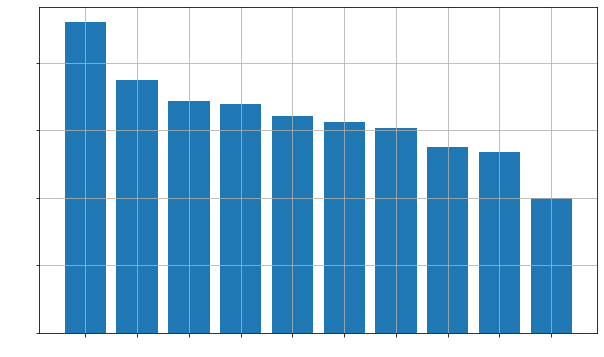

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

ans=[]

for word in range(len(a_to_b)):
    ans.append(a_to_b[word].surface)

c=Counter(ans)
top_10=c.most_common()[:10]

x=[]
y=[]

for i in range(len(top_10)):
    x.append(top_10[i][0])
    y.append(top_10[i][1])

plt.figure(figsize=(10,6))
plt.bar(x,y)
plt.xticks(x,color='white')
plt.yticks(color='white')
plt.grid(True)

# **37. 「猫」と共起頻度の高い上位10語**


「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ

In [ ]:
!pip install pyfpgrowth

     |████████████████████████████████| 1.6MB 2.8MB/s 
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5479 sha256=8fe679d0ed87e661d9b577a1f1d7ce121d195c579270e007df31c36b4e38e16a
  Stored in directory: /root/.cache/pip/wheels/3b/3f/0d/a04bb8b17887c1eca7d0f1a48d4aa0c09c96eb221ff7fa56c1
Successfully built pyfpgrowth


In [ ]:
import pyfpgrowth
import pprint
 
#分析
patterns = pyfpgrowth.find_frequent_patterns(ans, 30)
 
#降順に並び替えて見やすく表示
sorted_patterns = sorted(patterns.items(),reverse=True,key=lambda x:x[1])
pprint.pprint(sorted_patterns)


[(('の',), 12476),
 (('。',), 7486),
 (('、',), 6773),
 (('を',), 6119),
 (('「',), 3238),
 (('」',), 3238),
 (('い', 'な'), 2594),
 (('か', 'ら'), 2500),
 (('人',), 2287),
 (('あ', 'る'), 1839),
 (('事',), 1491),
 (('い', 'る'), 1407),
 (('君',), 1315),
 (('す', 'る'), 1230),
 (('へ',), 1097),
 (('一',), 1071),
 (('の', 'も'), 1050),
 (('主',), 1024),
 (('す', 'で'), 1020),
 (('う', '云'), 937),
 (('主', '人'), 933),
 (('御',), 851),
 (('う', 'よ'), 807),
 (('な', 'ん'), 756),
 (('か', 'し'), 753),
 (('な', 'ら'), 739),
 (('な', 'る'), 713),
 (('気',), 708),
 (('そ', 'の'), 689),
 (('こ', 'の'), 686),
 (('—',), 666),
 (('し', 'ま'), 653),
 (('い', 'ら'), 618),
 (('っ', 'な'), 616),
 (('そ', 'れ'), 612),
 (('か', 'な'), 602),
 (('う', 'そ'), 598),
 (('っ', 'て'), 588),
 (('方',), 565),
 (('吾',), 535),
 (('い', 'い'), 513),
 (('中',), 508),
 (('子',), 508),
 (('こ', 'と'), 502),
 (('っ', 'と'), 502),
 (('日',), 499),
 (('う', 'ど'), 497),
 (('今',), 494),
 (('い', 'し'), 492),
 (('こ', 'れ'), 489),
 (('く', 'ら'), 489),
 (('輩',), 485),
 (('じ', 'ゃ'), 484),
 (('心',)

# **38. ヒストグラム**


単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である

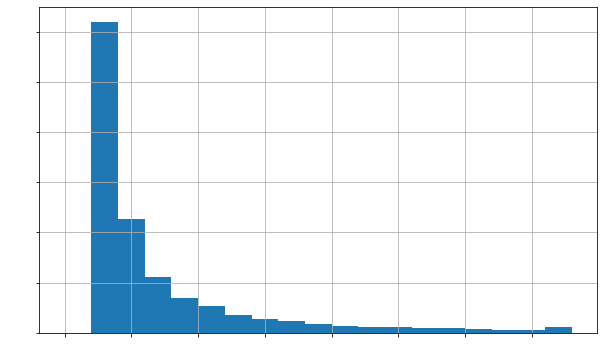

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline



c=Counter(ans)
data=c.most_common()

x=[]
y=[]

for i in range(len(data)):
    y.append(data[i][1])

plt.figure(figsize=(10,6))
plt.hist(y,range(20))
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(True)

# **39. Zipfの法則**


単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ

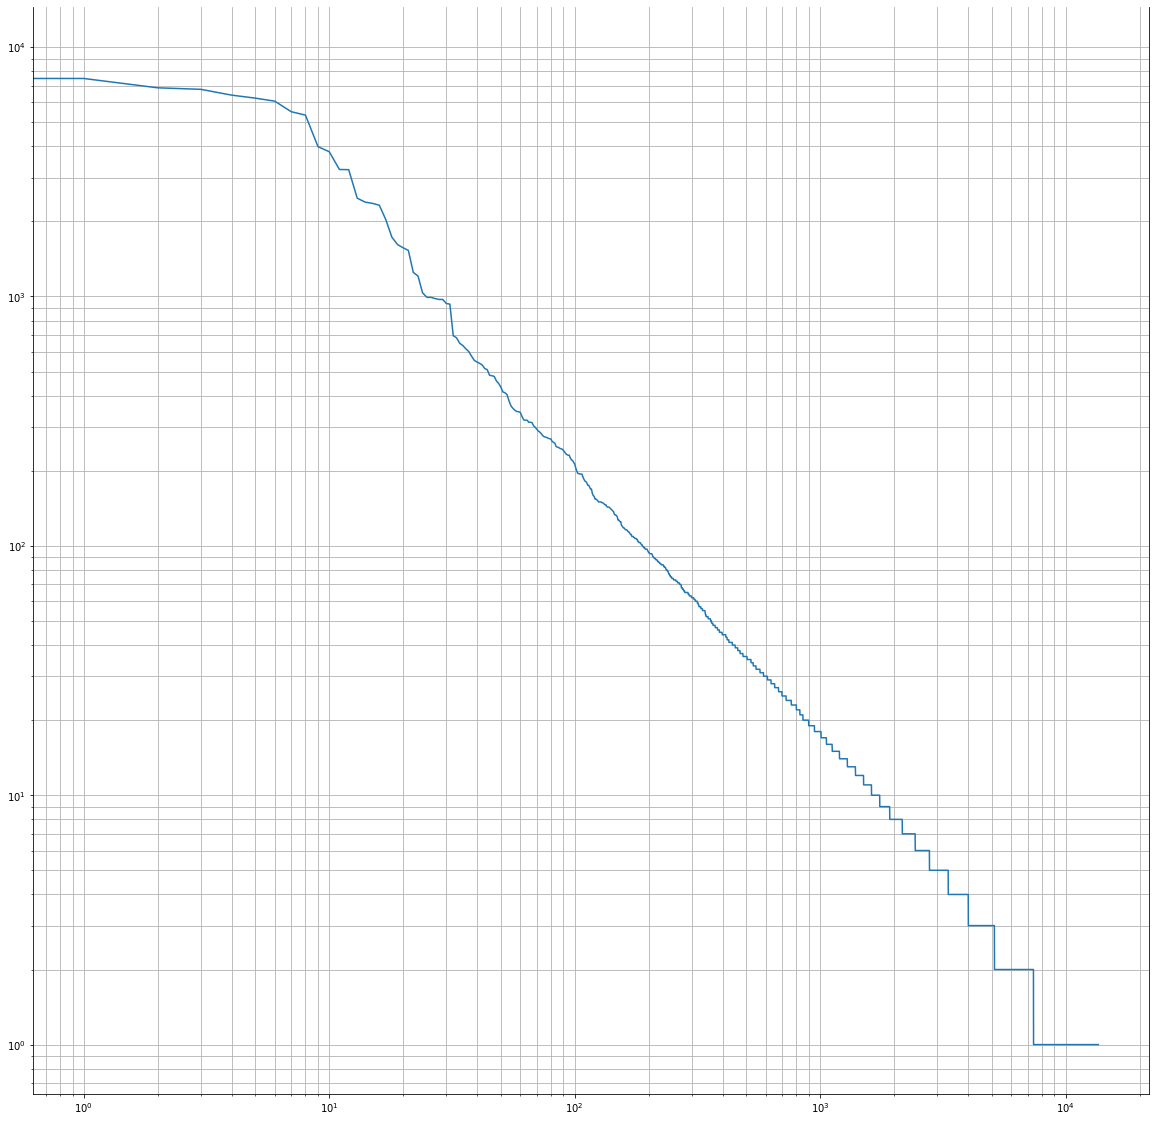

In [ ]:
 # プロットする関数
plt.figure(figsize=(20,20))
plt.plot(y)

ax = plt.gca()
ax.spines['top'].set_color('none')

ax.set_yscale('log')  # y軸をlogスケールで描く
ax.set_xscale('log')

plt.grid(which="both") # グリッド表示。"both"はxy軸両方にグリッドを描く。

plt.show()